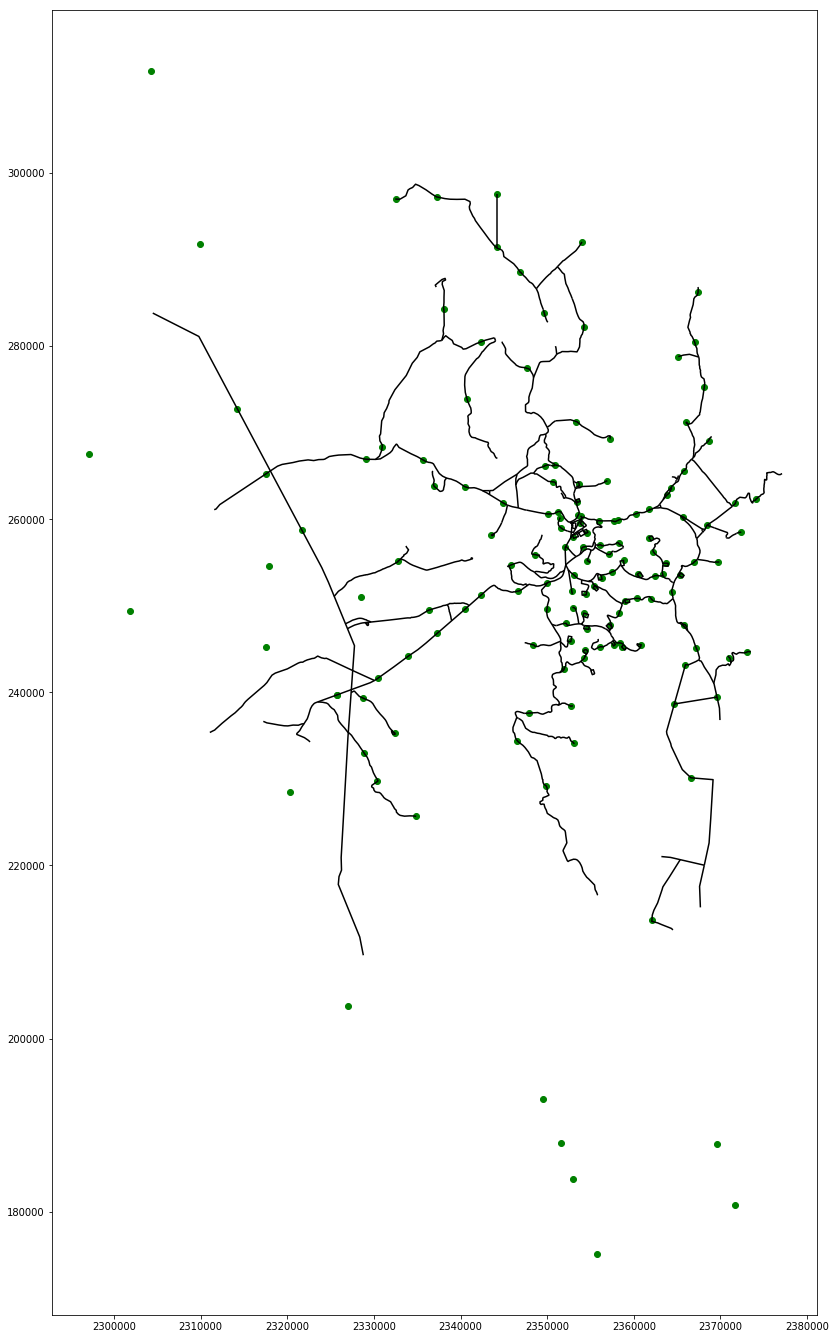

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

data_closet_at_road_geojson = '../../data/closest_at_road.geojson'
data_roads_pads_network_geojson = '../../data/roads_pads_network_w_stations.geojson'
local_coordinate = '''+proj=lcc +lat_1=36 +lat_2=37.25 
                 +lat_0=35.33333333333334 +lon_0=-119 
                 +x_0=609601.2192024384 +y_0=0 
                 +datum=NAD27 +units=us-ft +no_defs'''

plt.rcParams['figure.figsize'] = (30, 24)
df_stations = gpd.read_file(data_closet_at_road_geojson)
df_stations.crs = local_coordinate
df_roads = gpd.read_file(data_roads_pads_network_geojson)
df_roads.crs = local_coordinate

ax = df_roads.plot(color='black')
df_stations.plot(ax=ax, color='green')

plt.show()


In [2]:
import json

def pointToKey(p):
    # Easting#Northing
    key = str(int(p[0])) + "#" + str(int(p[1]))
    #print(key)
    return key

def create_vertex_dic(geojson_file):
    vertex_dic = {}
    with open(geojson_file) as f:
        data = json.load(f)
    for feature in data['features']:
        #print("+++ FEATURE +++")
        for line in feature['geometry']['coordinates']:
            #print("*** LINE ***")
            #print(line)
            for i in range(len(line)):
                point = line[i]
                key = pointToKey(point)
                point_info = vertex_dic.get(key)
                if point_info is None:
                    vertex_dic[key] = {}
                    vertex_dic[key]['id'] = len(vertex_dic)-1 # start from 0
                    vertex_dic[key]['adj'] = set()
                    point_info = vertex_dic[key]

                if i > 0:
                    left_key = pointToKey(line[i-1])
                    left_point_info = vertex_dic.get(left_key)
                    if left_point_info is not None:
                        point_info['adj'].add(left_point_info['id'])
                        left_point_info['adj'].add(vertex_dic[key]['id'])
                    else:
                        print("Left point is None!")
    return vertex_dic

vertex_dictionary = create_vertex_dic(data_roads_pads_network_geojson)

In [3]:
print(vertex_dictionary)

{'2355593#257204': {'id': 0, 'adj': {1}}, '2355569#257215': {'id': 1, 'adj': {0}}, '2354350#258324': {'id': 2, 'adj': {3}}, '2354396#258353': {'id': 3, 'adj': {2}}, '2365303#247962': {'id': 4, 'adj': {5, 3470, 3471}}, '2365382#247938': {'id': 5, 'adj': {4, 6}}, '2365602#247763': {'id': 6, 'adj': {5, 7}}, '2365870#247529': {'id': 7, 'adj': {8, 6}}, '2366031#247326': {'id': 8, 'adj': {9, 7}}, '2366200#247124': {'id': 9, 'adj': {8, 3451, 3452}}, '2365090#264721': {'id': 10, 'adj': {11, 309, 295}}, '2365028#264606': {'id': 11, 'adj': {10, 39}}, '2355494#242133': {'id': 12, 'adj': {16, 13}}, '2355327#242604': {'id': 13, 'adj': {12, 14}}, '2355109#242527': {'id': 14, 'adj': {13, 38, 15}}, '2355044#242504': {'id': 15, 'adj': {16, 14}}, '2355211#242033': {'id': 16, 'adj': {12, 15}}, '2352140#262466': {'id': 17, 'adj': {1248, 18, 3203}}, '2352099#262466': {'id': 18, 'adj': {17, 19}}, '2351991#262405': {'id': 19, 'adj': {18, 20}}, '2351960#262405': {'id': 20, 'adj': {19, 21}}, '2351902#262424': 

In [4]:
import pandas as pd
from shapely.geometry import Point

# convert lists to dataframe
df_lines = pd.DataFrame({'Easting': [1,2,3], 'Northing': [4,5,6]})

# creating a geometry column 
geometry = [Point(xy) for xy in zip([1,2,3], [4,5,6])]

# coordinate reference system
crs = '+proj=lcc +lat_1=36 +lat_2=37.25 +lat_0=35.33333333333334 +lon_0=-119 +x_0=609601.2192024384 +y_0=0 +datum=NAD27 +units=us-ft +no_defs'

# creating a geographic data frame 
gdf_lines = gpd.GeoDataFrame(df_lines, crs=crs, geometry=geometry)

print(gdf_lines)

   Easting  Northing     geometry
0        1         4  POINT (1 4)
1        2         5  POINT (2 5)
2        3         6  POINT (3 6)
